In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# https://en.wikipedia.org/wiki/Robust_regression
# https://en.wikipedia.org/wiki/Huber_loss

Q: Why do many DQN implementations use huber loss?

The Huber loss function is a function robust to outliers, and used when there is the presence of heteroskedasticity, i.e variance of residuals has a dependence on the underlying independent variables.
#\usepackage{amsmath}
    $$L_{\delta}(a) =
        \begin{cases}
        \frac{1}{2}a^2 & for |a| \leq \delta\\
        \delta(|a| - \frac{1}{2}\delta) & otherwise
        \end{cases}
      $$

In [3]:
xs = np.linspace(-4.,4.,num=1000)

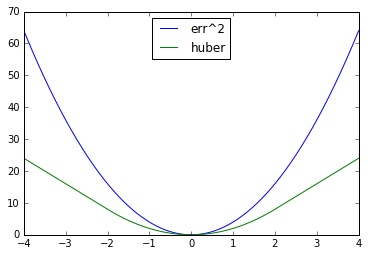

In [4]:
def huber(row, **kwargs):
    a = row['y'] - row['yt']
    d = kwargs['delta']
    return 0.5 * a**2 if np.abs(a) <= d else d *(np.abs(a)- 0.5*d)
    

# Create arbitrary function f(x) = 2x. (Wiki article uses f(x) = x)
f = lambda x: 2*x

df = pd.DataFrame(xs)
df['yt'] = df.apply(f, axis=1)
# Set label y to 0
df['y'] = np.zeros(len(xs))
df.rename(columns={0:'xs'}, inplace=True)
df['err^2'] = (df['yt'] - df['y'])**2
df['huber'] = df.apply(huber, delta=4.0, axis=1)

compare = df[['err^2','huber']]
compare.index = xs
compare.plot()

# We can visually confirm that for relatively larger errors will have a smaller weighted contribution for all errors.

In DQN or any algorithm that requires exploration of a n-dimensional space based on some random policy is prone to introducing "outliers" to the estimation of an expected value, in the DQN case its the state action value function, $Q(s,a)$. 